<a href="https://colab.research.google.com/github/nikhilkumar293/Machine_Learning/blob/main/Self_assesment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
possum = pd.read_csv("/content/possum.csv")

In [ ]:
possum.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [ ]:


# Dropping features that do not seem to add any value to our model

possum.drop(['case', 'site','Pop'], axis=1, inplace=True)



In [ ]:
possum.sex = possum.sex.map({'m': 0, 'f': 1})

In [ ]:
possum[pd.isnull(possum).any(axis=1)]

,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
40,1,5.0,88.4,57.0,83.0,36.5,NaN,40.3,15.9,27.0,30.5
43,0,NaN,85.1,51.5,76.0,35.5,70.3,52.6,14.4,23.0,27.0
45,0,NaN,91.4,54.4,84.0,35.0,72.8,51.2,14.4,24.5,35.0


In [ ]:


# Filling the missing values with average

possum.age.fillna(possum.age.mean(), inplace=True)
possum.footlgth.fillna(possum.footlgth.mean(), inplace=True)



In [ ]:
y = possum.sex.copy()
X = possum.drop(['sex'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [ ]:


model = LogisticRegression()
model.fit(X_train, y_train)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:

y_pred = pd.Series(model.predict(X_test))
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction']
z.head()

,True,Prediction
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.38461538461538464
Precision: 0.5
Recall: 0.3125


Text(0.5, 15.0, 'Predicted')

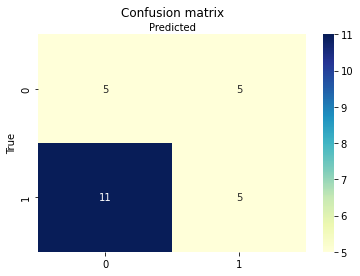

In [ ]:


cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')



In [ ]:
possum.drop(['hdlngth', 'footlgth','taill','chest','belly'], axis=1, inplace=True)

possum['totlngth'] = possum['totlngth']*10



In [ ]:
y = possum.sex.copy()
X = possum.drop(['sex'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = pd.Series(model.predict(X_test))
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction']
z.head()

,True,Prediction
0,0,0
1,1,0
2,1,0
3,1,1
4,0,0


In [ ]:


print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))



Accuracy: 0.5384615384615384
Precision: 0.8333333333333334
Recall: 0.3125


Text(0.5, 15.0, 'Predicted')

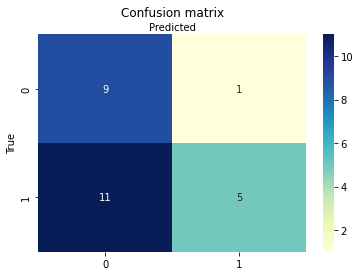

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')